In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats 
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib 
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing the dataset 
df = pd.read_csv("weather.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21/06/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22/06/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23/06/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24/06/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.describe

<bound method NDFrame.describe of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       01/12/2008   Albury     13.4     22.9       0.6          NaN   
1       02/12/2008   Albury      7.4     25.1       0.0          NaN   
2       03/12/2008   Albury     12.9     25.7       0.0          NaN   
3       04/12/2008   Albury      9.2     28.0       0.0          NaN   
4       05/12/2008   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  21/06/2017    Uluru      2.8     23.4       0.0          NaN   
145456  22/06/2017    Uluru      3.6     25.3       0.0          NaN   
145457  23/06/2017    Uluru      5.4     26.9       0.0          NaN   
145458  24/06/2017    Uluru      7.8     27.0       0.0          NaN   
145459  25/06/2017    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN          

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
#counting the number of unique values in each column.
df.select_dtypes('object').apply(pd.Series.nunique, axis =0)  

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

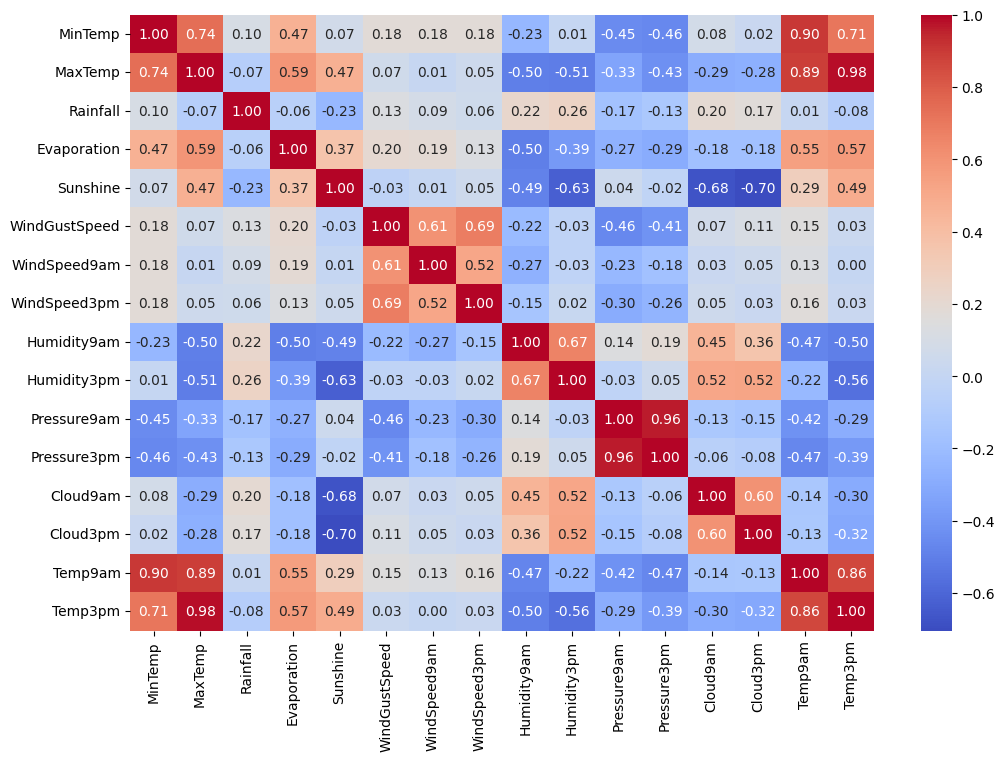

Features highly correlated with any other feature:
MinTemp
MaxTemp
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


In [6]:
# analyzing and identifying highly correlated features.
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
threshold = 0.6 
highly_correlated_features = []
for col in correlation_matrix.columns:
    temp = correlation_matrix[col].drop(col)
    if any(abs(temp) > threshold):
        highly_correlated_features.append(col)
print("Features highly correlated with any other feature:")
for feature in highly_correlated_features:
    print(feature)


In [7]:
#separate the input variables(X) and the target variable (Y). 
X = df.iloc[:,[3,4,6,8,11,12,13,14,15,16,17,18,19,20,21]].values
Y = df.iloc[:,[-1]].values 
print(X)
print(Y)

[[22.9 0.6 nan ... 16.9 21.8 'No']
 [25.1 0.0 nan ... 17.2 24.3 'No']
 [25.7 0.0 nan ... 21.0 23.2 'No']
 ...
 [26.9 0.0 nan ... 12.5 26.1 'No']
 [27.0 0.0 nan ... 15.1 26.0 'No']
 [nan 0.0 nan ... 15.0 20.9 'No']]
[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


In [8]:
#converting Y from a 1-dimensional array to a 2-dimensional array for combatibility 
Y = Y.reshape(-1,1) 
print(Y) 

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


In [9]:
#dealing with missing values 
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X=imputer.fit_transform(X)
Y=imputer.fit_transform(Y)
print(X)
print(Y)

[[22.9 0.6 0.0 ... 16.9 21.8 'No']
 [25.1 0.0 0.0 ... 17.2 24.3 'No']
 [25.7 0.0 0.0 ... 21.0 23.2 'No']
 ...
 [26.9 0.0 0.0 ... 12.5 26.1 'No']
 [27.0 0.0 0.0 ... 15.1 26.0 'No']
 [20.0 0.0 0.0 ... 15.0 20.9 'No']]
[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


In [10]:
#convert categorical labels into numerical values.
#makes them suitable for use in ML models that require numerical input.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col_index in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]:  
    X[:, col_index] = le.fit_transform(X[:, col_index])
le6 = LabelEncoder()
Y= le6.fit_transform(Y)
 
print(X)
print(Y)

[[262 6 0 ... 224 262 0]
 [284 0 0 ... 227 287 0]
 [290 0 0 ... 265 276 0]
 ...
 [302 0 0 ... 180 305 0]
 [303 0 0 ... 206 304 0]
 [233 0 0 ... 205 253 0]]
[0 0 0 ... 0 0 0]


<Axes: xlabel='RainTomorrow', ylabel='Count'>

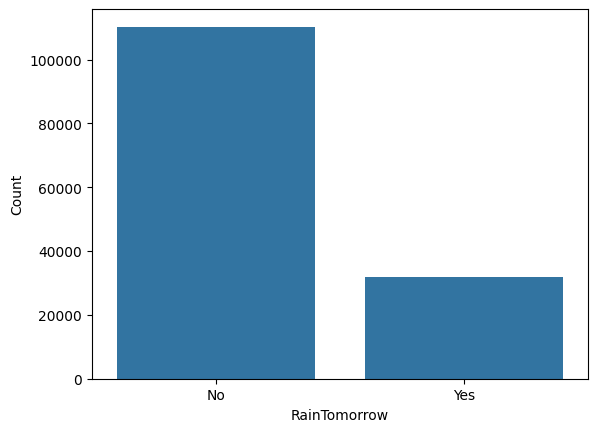

In [11]:
# bar plot for rain tommorow
counts = df['RainTomorrow'].value_counts()
counts_df = counts.reset_index()
counts_df.columns = ['RainTomorrow', 'Count']
sns.barplot(x='RainTomorrow', y='Count', data=counts_df)


In [12]:
#checking the parameters
features = list(df.select_dtypes(include = np.number).columns)
print(features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


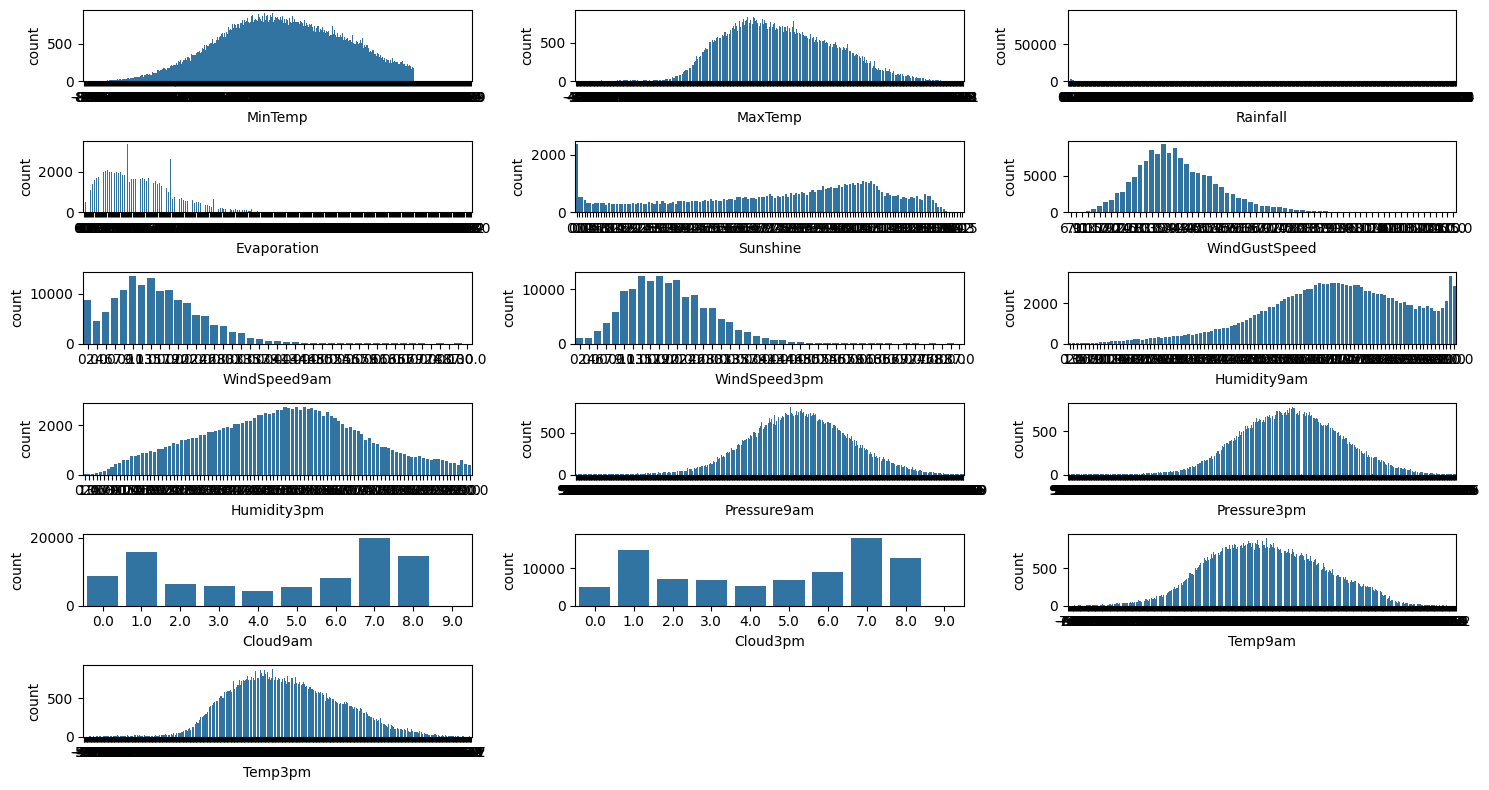

In [13]:
#visualizing how categorical variables are distributed and comparing them across different features in the dataset.
plt.figure(figsize=(15,8))
for i, feature in enumerate(features):
    plt.subplot(6, 3, i + 1)
    sns.countplot(x=feature, data=df)
plt.tight_layout()
plt.show()


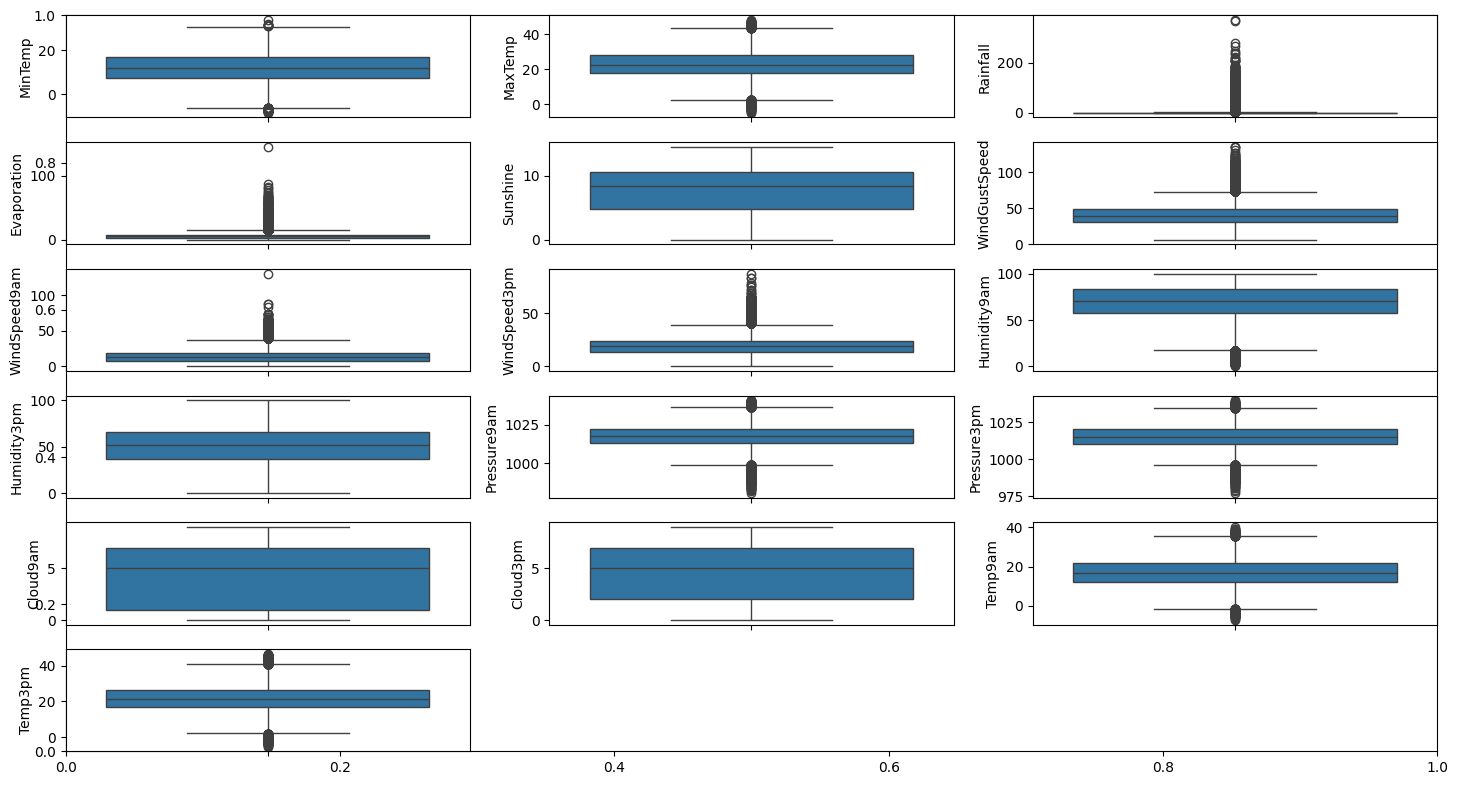

In [14]:
#A for loop to plot a boxplot for all the continuous feature
#identifying outliers and understanding the spread and central tendency of each continuous variable.
plt.subplots(figsize=(15,8))
for i, col in enumerate(features):
  plt.subplot(6, 3, i + 1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [15]:

# Scale features to ensure each feature has a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [16]:

#splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

print(X_train)
print(Y_train)

[[ 0.07140442 -0.30843255  0.71418443 ...  0.68374365  0.08146164
  -0.52979545]
 [ 0.11369307 -0.30843255  1.48328904 ... -0.41725297  0.22734488
  -0.52979545]
 [-0.14003883 -0.08707283  1.20555682 ... -0.06059209 -0.02065663
   1.88752093]
 ...
 [ 0.93127361 -0.34532584 -0.84538881 ...  1.10243251  1.07346767
  -0.52979545]
 [-0.16823126  0.33719998  0.7996405  ...  0.01694288 -0.28324646
   1.88752093]
 [-0.91533072 -0.19775269 -0.84538881 ... -0.35522499 -0.76466115
  -0.52979545]]
[1 0 0 ... 0 0 0]


In [17]:
print(X_test)

[[ 2.28451038 -0.05017954  1.61147315 ...  1.9863312   2.00712041
   1.88752093]
 [ 2.01668227 -0.34532584  0.94918862 ...  1.59865633  2.05088538
  -0.52979545]
 [-0.84484964 -0.30843255 -0.84538881 ... -1.06854675 -0.80842613
  -0.52979545]
 ...
 [-1.09858153  0.70613286 -0.84538881 ... -0.97550478 -1.12936926
   1.88752093]
 [ 0.52248334 -0.34532584  0.69282041 ...  0.66823665  0.6066413
  -0.52979545]
 [-0.90123451 -0.34532584  1.44056101 ... -0.71188587 -0.73548451
  -0.52979545]]


In [18]:
# initialise random forest classifier model
rf_classifier = RandomForestClassifier(random_state=42)

In [19]:
#training classifier on the training data 
rf_classifier.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [20]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

# Make predictions on the training and test data
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

#Display the predicted values along with the actual values
result_df = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
print(result_df)

       Actual  Predicted
0           1          0
1           1          0
2           0          0
3           0          1
4           0          0
...       ...        ...
29087       0          1
29088       0          0
29089       1          0
29090       0          0
29091       0          0

[29092 rows x 2 columns]


In [21]:
#evaluate the model by printing accuracy score 
print("Accuracy: ", rf_classifier.score(X_test,Y_test)*100, '%')


Accuracy:  85.12993262752647 %


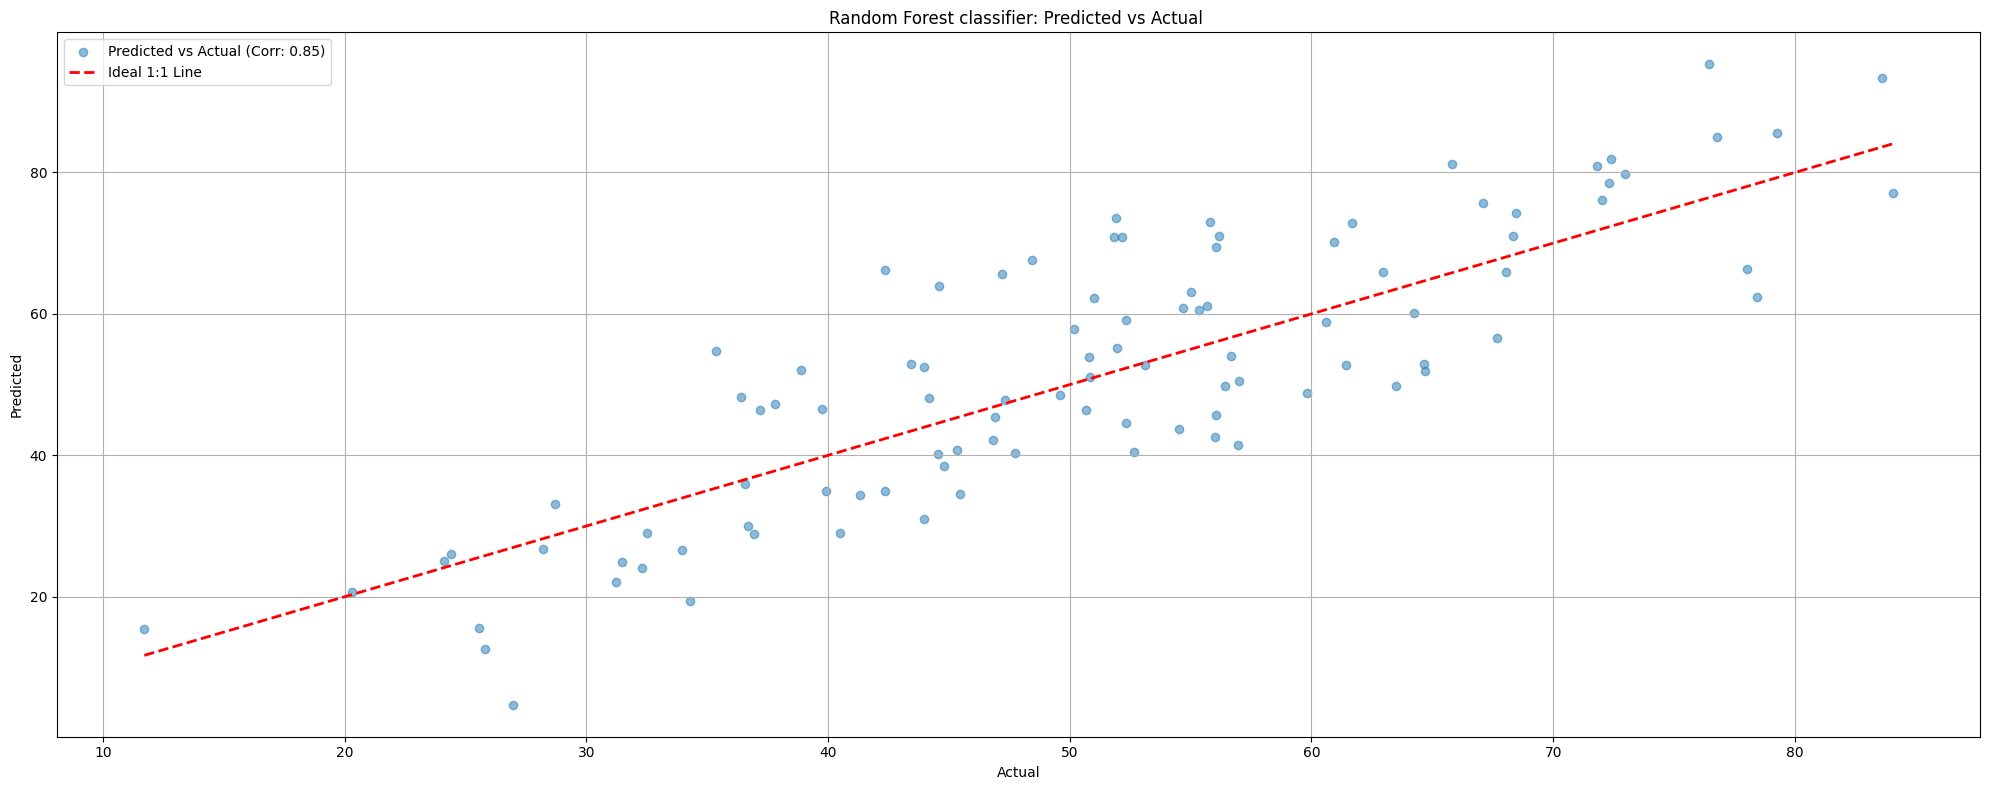

In [22]:
#visual comparison between the predicted and actual values.
#enables assessment of how well the model's predictions align with the ground truth values.
np.random.seed(0) 
Y_test = np.random.normal(50, 15, 100)  
y_pred = Y_test + np.random.normal(0, 10, 100)  
corr, _ = pearsonr(Y_test, y_pred)
plt.figure(figsize=(20,8))
plt.scatter(Y_test, y_pred, alpha=0.5, label=f'Predicted vs Actual (Corr: {corr:.2f})')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', linewidth=2, label='Ideal 1:1 Line')
plt.title("Random Forest classifier: Predicted vs Actual ")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()  
plt.grid(True)  
plt.tight_layout()
plt.show()


In [23]:
#model comparison (Logistic Regression model)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [24]:
# Create the Logistic Regression model
model = LogisticRegression(max_iter=500)


In [25]:
# Fit the model on the training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [26]:
# Make predictions on the test data
predicted = model.predict(x_test)


In [27]:

# Evaluate the model
conf = confusion_matrix(y_test, predicted)
print("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted) * 100, "%")


The accuracy of Logistic Regression is :  84.15371923552867 %


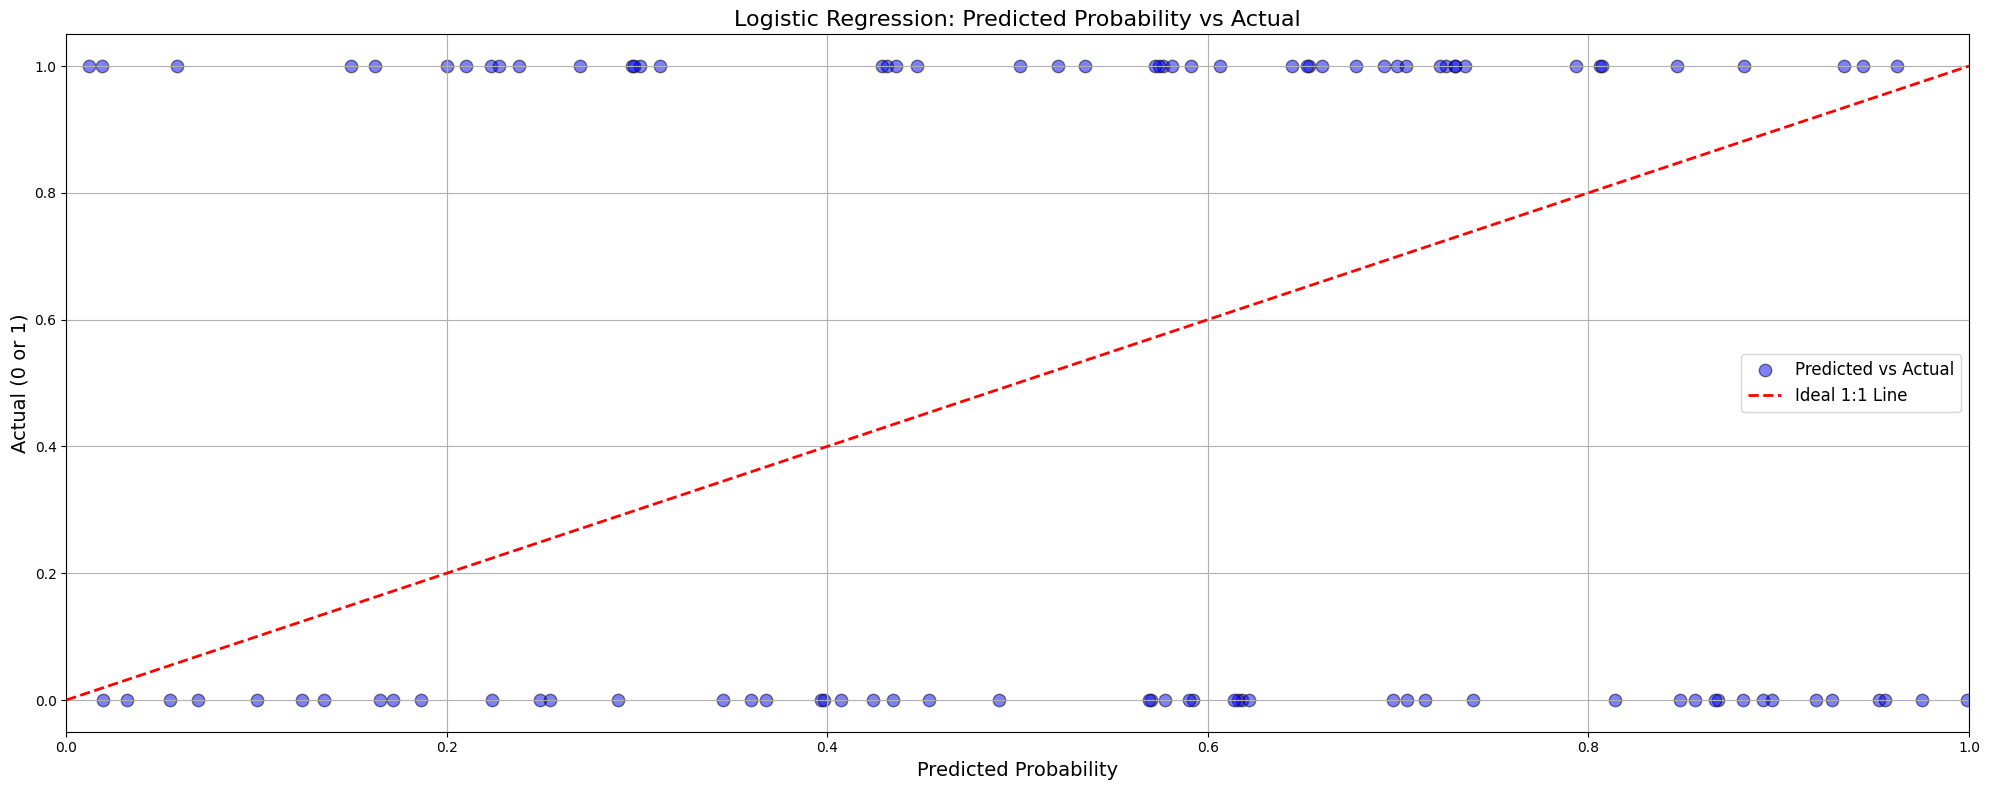

In [28]:

# Generate random data for demonstration
np.random.seed(0)
# Simulated predicted probabilities between 0 and 1
Y_test = np.random.choice([0, 1], size=100, p=[0.5, 0.5])
y_pred_prob = np.random.rand(100)  
plt.figure(figsize=(20, 8))
# Scatter plot with threshold for classification
plt.scatter(y_pred_prob, Y_test, alpha=0.5, label='Predicted vs Actual', color='blue', marker='o', edgecolors='k', s=80)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', linewidth=2, label='Ideal 1:1 Line')
plt.xlim(0, 1)
# Title, axis labels, and legend
plt.title("Logistic Regression: Predicted Probability vs Actual", fontsize=16)
plt.xlabel("Predicted Probability", fontsize=14)
plt.ylabel("Actual (0 or 1)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
#model comparison (XGBoost Classifier)
#initialise the XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
xgbc = XGBClassifier(objective='binary:logistic')
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [30]:
#train the model
xgbc.fit(x_train, y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
#make prediction
predicted = xgbc.predict(x_test)


In [32]:
#evaluate the model by printing accuracy score
print("The accuracy of XGBoost Classifier is : ", accuracy_score(y_test, predicted) * 100, "%")


The accuracy of XGBoost Classifier is :  84.99243778358311 %


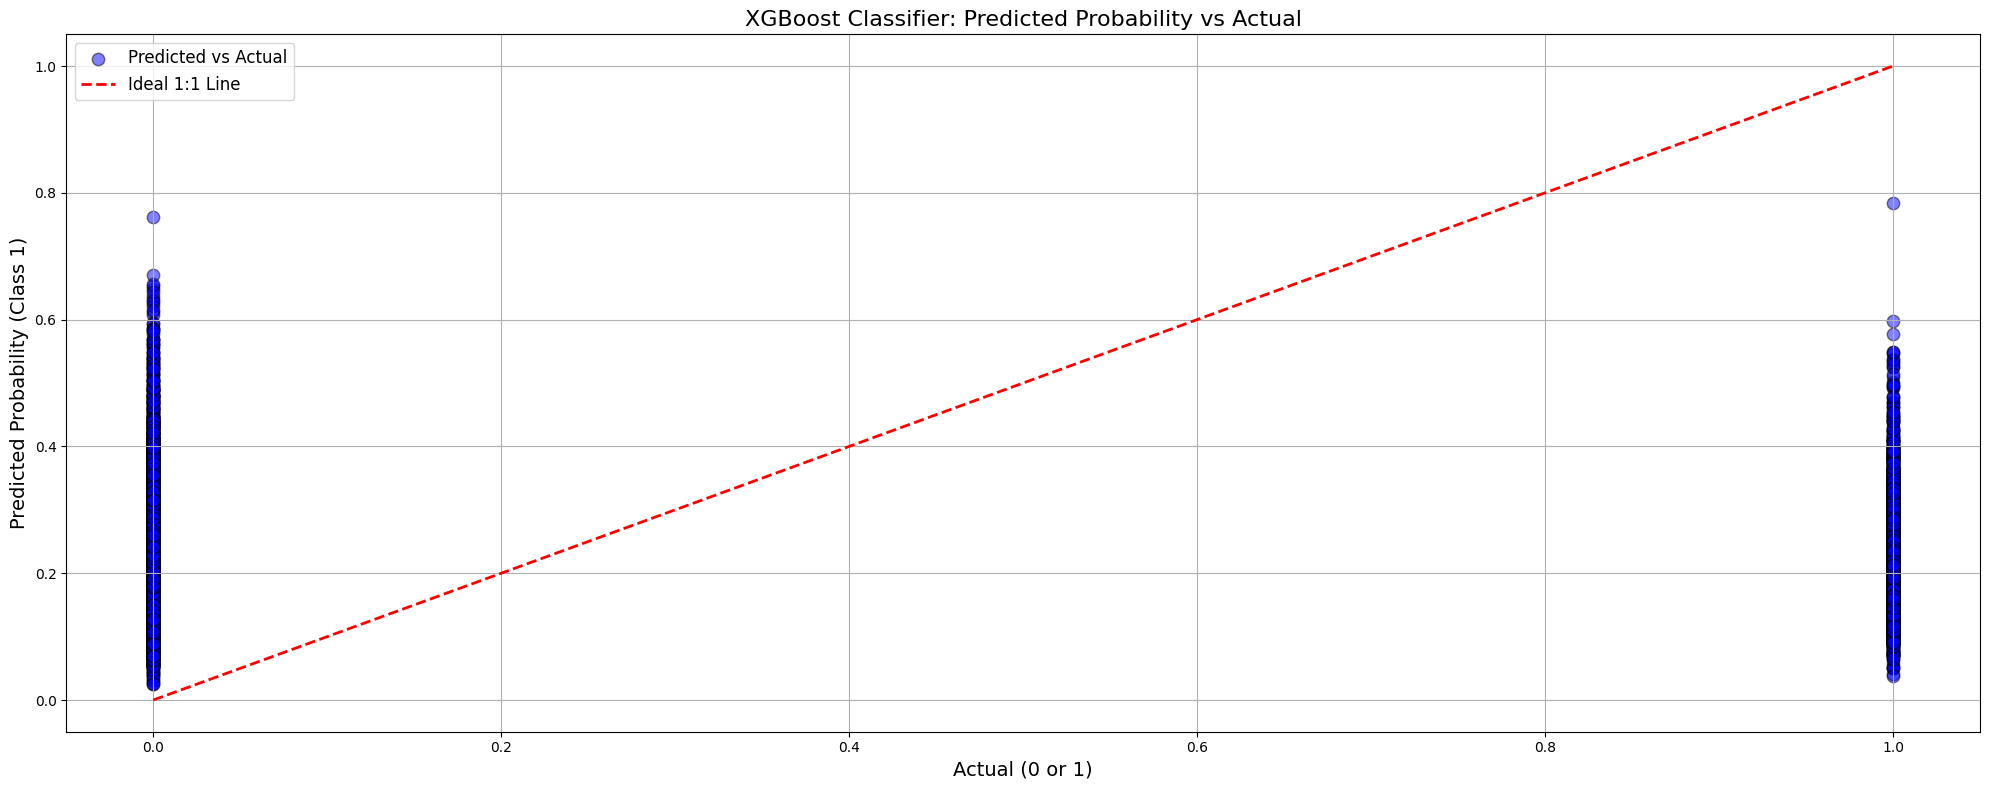

In [33]:

# Create an XGBoost classifier (for demonstration purposes)
xgb_classifier = XGBClassifier()
# Fit the model to the data (for demonstration purposes)
xgb_classifier.fit(X_train, y_train)
# Predict class probabilities Probability of class 1
y_pred_xgboost_prob = xgb_classifier.predict_proba(X_test)[:, 1]  
plt.figure(figsize=(20, 8))
plt.scatter(y_test, y_pred_xgboost_prob, alpha=0.5, label='Predicted vs Actual', color='blue', marker='o', edgecolors='k', s=80)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Ideal 1:1 Line')
plt.title("XGBoost Classifier: Predicted Probability vs Actual", fontsize=16)
plt.xlabel("Actual (0 or 1)", fontsize=14)
plt.ylabel("Predicted Probability (Class 1)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
